In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     print(dirname)

## Load data

In [4]:
batch_size = 32
img_height = 32  #all img in our dataset are of 32x32 default
img_width = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/kaggle/input/devanagari-character-dataset-large/dhcd/train",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 78200 files belonging to 46 classes.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/kaggle/input/devanagari-character-dataset-large/dhcd/test",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13800 files belonging to 46 classes.


In [8]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '5', '6', '7', '8', '9']


tf.Tensor(33, shape=(), dtype=int32)
tf.Tensor(45, shape=(), dtype=int32)
tf.Tensor(43, shape=(), dtype=int32)
tf.Tensor(37, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)


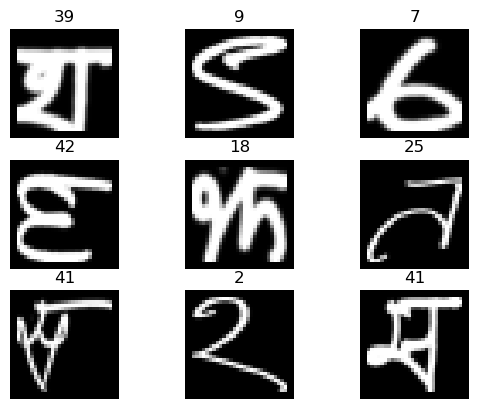

In [19]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    print(labels[i])
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Configure the dataset for performance

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Creating Model

In [11]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compiling the Model

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          1

## Train the Model

In [14]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
2444/2444 [==============================] - 93s 30ms/step - loss: 0.4562 - accuracy: 0.8681 - val_loss: 0.1468 - val_accuracy: 0.9556
Epoch 2/10
2444/2444 [==============================] - 58s 24ms/step - loss: 0.1180 - accuracy: 0.9637 - val_loss: 0.0965 - val_accuracy: 0.9718
Epoch 3/10
2444/2444 [==============================] - 57s 23ms/step - loss: 0.0759 - accuracy: 0.9760 - val_loss: 0.0969 - val_accuracy: 0.9727
Epoch 4/10
2444/2444 [==============================] - 59s 24ms/step - loss: 0.0562 - accuracy: 0.9823 - val_loss: 0.0921 - val_accuracy: 0.9743
Epoch 5/10
2444/2444 [==============================] - 57s 24ms/step - loss: 0.0416 - accuracy: 0.9866 - val_loss: 0.0993 - val_accuracy: 0.9710
Epoch 6/10
2444/2444 [==============================] - 57s 23ms/step - loss: 0.0362 - accuracy: 0.9881 - val_loss: 0.0929 - val_accuracy: 0.9751
Epoch 7/10
2444/2444 [==============================] - 57s 23ms/step - loss: 0.0302 - accuracy: 0.9898 - val_loss: 0.1051 -

## Visualize training results
Create plots of the loss and accuracy on the training and validation sets:

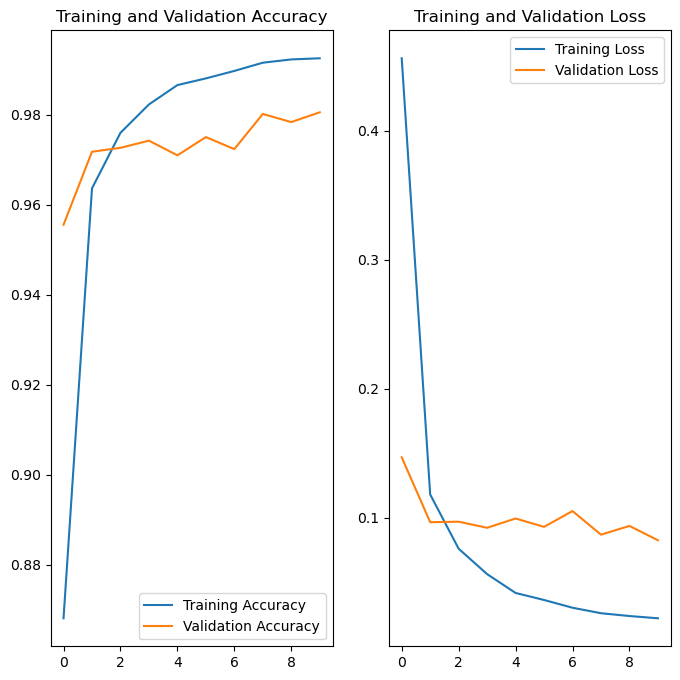

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Reading labels.csv file

In [20]:
labels_csv = pd.read_csv("/kaggle/input/devanagari-character-dataset-large/labels.csv")

In [21]:
labels_csv.head()

,Class,Label,Devanagari label,Phonetic,Type
0,0,0,०,Śūn'ya,DIGIT
1,1,1,१,ēka,DIGIT
2,2,2,२,du'ī,DIGIT
3,3,3,३,tīna,DIGIT
4,4,4,४,cāra,DIGIT


Predicting on new data

In [22]:
img = tf.keras.utils.load_img(
    "/kaggle/input/nepali-devanagari-for-predicting/predict (1).png", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 138ms/step
This image most likely belongs to 16 with a 100.00 percent confidence.


In [23]:
img = tf.keras.utils.load_img(
    "/kaggle/input/nepali-devanagari-for-predicting/predict (2).png", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to 5 with a 100.00 percent confidence.
